In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import random
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output

In [2]:
print(check_output(["ls", "./"]).decode("utf8"))

# Any results you write to the current directory are saved as output.

Data_analysis_football.ipynb
dictionary.txt
events.csv
ginf.csv
goals.jpg
lessoffensiveteam.jpg
offensiveteam.jpg
offensiveteamplayer.jpg
redcard.jpg



In [3]:
## Loading events dataset
df_events = pd.read_csv("./events.csv")
## Loading ginf dataset, which has some important data to merge with event dataset
df_ginf = pd.read_csv("./ginf.csv")
## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
df_ginf = df_ginf[['id_odsp', 'date', 'league', 'season', 'country']]

In [4]:
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_events = df_events.merge(df_ginf, how='left')

In [5]:
## Naming the leagues with their popular names, which will make thinks much clear for us
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}


In [6]:
## Apply the mapping
df_events['league'] = df_events['league'].map(leagues)

In [7]:
## Events type 1
event_type_1 = pd.Series([
    'Announcement',
    'Attempt',
    'Corner',
    'Foul',
    'Yellow card',
    'Second yellow card',
    'Red card',
    'Substitution',
    'Free kick won',
    'Offside',
    'Hand ball',
    'Penalty conceded'], index=[[item for item in range(0, 12)]])

## Events type 2
event_type2 = pd.Series(['Key Pass', 'Failed through ball', 'Sending off', 'Own goal'],
                       index=[[item for item in range(12, 16)]])

## Match side
side = pd.Series(['Home', 'Away'], index=[[item for item in range(1, 3)]])

## Shot place
shot_place = pd.Series([
    'Bit too high', 
    'Blocked',
    'Bottom left corner',
    'Bottom right corner',
    'Centre of the goal',
    'High and wide',
    'Hits the bar',
    'Misses to the left',
    'Misses to the right',
    'Too high',
    'Top centre of the goal',
    'Top left corner',
    'Top right corner'
], index=[[item for item in range(1, 14)]])

## Outcome of shot
shot_outcome = pd.Series(['On target', 'Off target', 'Blocked', 'Hit the bar'],
                        index=[[item for item in range(1, 5)]])
## Location of shot
location = pd.Series([
    'Attacking half',
    'Defensive half',
    'Centre of the box',
    'Left wing',
    'Right wing',
    'Difficult angle and long range',
    'Difficult angle on the left',
    'Difficult angle on the right',
    'Left side of the box',
    'Left side of the six yard box',
    'Right side of the box',
    'Right side of the six yard box',
    'Very close range',
    'Penalty spot',
    'Outside the box',
    'Long range',
    'More than 35 yards',
    'More than 40 yards',
    'Not recorded'
], 
index=[[item for item in range(1, 20)]])

## Players' body part
bodypart = pd.Series(['right foot', 'left foot', 'head'], index=[[item for item in range(1, 4)]])

## Assist method
assist_method = pd.Series(['None', 'Pass', 'Cross', 'Headed pass', 'Through ball'],
                         index=[item for item in range(0, 5)])

## Situation
situation = pd.Series(['Open play', 'Set piece', 'Corner', 'Free kick'],
                     index=[item for item in range(1, 5)])

In [151]:
event_type_1

0           Announcement
1                Attempt
2                 Corner
3                   Foul
4            Yellow card
5     Second yellow card
6               Red card
7           Substitution
8          Free kick won
9                Offside
10             Hand ball
11      Penalty conceded
dtype: object

In [8]:
## Utility function to plot bar plots with similar configuration
## this function was took from this website : 
#https://www.kaggle.com/luizhsda/football-exploratory-data-analysis-eda
def plot_barplot(data, x_ticks, x_labels, y_labels, title, color='muted'):
    ## Set standard style as whitegrid (this also could be customized via param)
    sns.set_style("whitegrid")   # Proposed themes: darkgrid, whitegrid, dark, white, and ticks

    ## Set a figure with custom figsize
    #plt.figure(figsize=(num, figsize)) num=10, figsize=8
    ## Plottin data
    ax = sns.barplot(x = [j for j in range(0, len(data))], y=data.values, palette=color)
    ## Setting ticks extracted from data indexes
    ax.set_xticks([j for j in range(0, len(data))])
    ## Set labels of the chart
    ax.set_xticklabels(x_ticks, rotation=45)
    ax.set(xlabel = x_labels, ylabel = y_labels, title = title)
    ax.plot();
    plt.tight_layout()

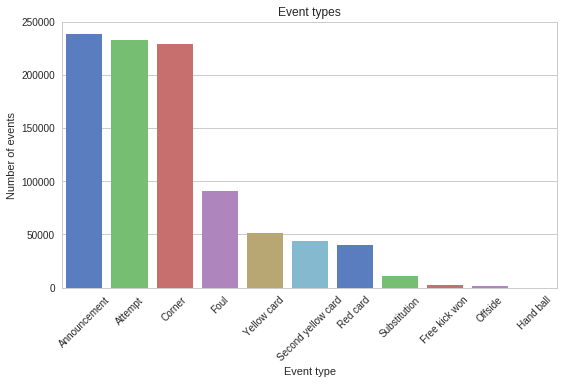

In [163]:
## Count of events occurecies
events_series = df_events['event_type'].value_counts()

## Plotting chart 
plot_barplot(events_series, event_type_1.values,
            "Event type", "Number of events", "Event types")

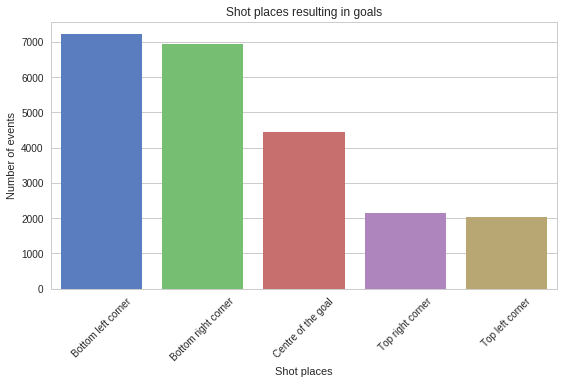

In [164]:
## Filtering out dataframe to extract attemtps which resulted in goals
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 1)]['shot_place'].value_counts()

## Plotting the chart
plot_barplot(df_shot_places, shot_place[[3, 4, 5, 13, 12]], 'Shot places', 'Number of events',
    'Shot places resulting in goals')

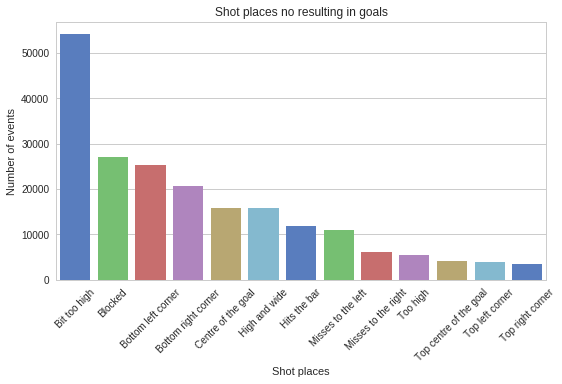

In [165]:
## Filtering out dataframe to extract attemtps which resulted in goals
df_shot_places = df_events[(df_events['event_type'] == 1) & 
                           (df_events['is_goal'] == 0)]['shot_place'].value_counts()

## Plotting the chart
plot_barplot(df_shot_places, shot_place, 'Shot places', 'Number of events',
    'Shot places no resulting in goals')

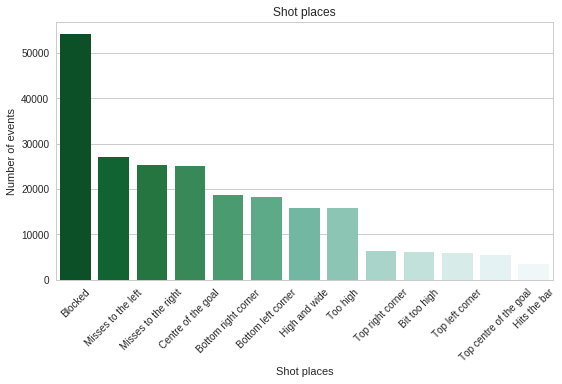

In [159]:
## Copying original dataframe
df_shot_places_ed = df_events.copy()

## Grouping data by shot places
df_shot_places_ed = df_events.groupby('shot_place', as_index=False).count().sort_values('id_event',
                                                   ascending=False).dropna()

## Mapping dataframe index to shot places labels available in the dictionary file
df_shot_places_ed['shot_place'] = df_shot_places_ed['shot_place'].map(shot_place)

## Plotting the chart
plot_barplot(df_shot_places_ed['id_event'], df_shot_places_ed['shot_place'],
             'Shot places',
             'Number of events',
             'Shot places',
             'BuGn_r')

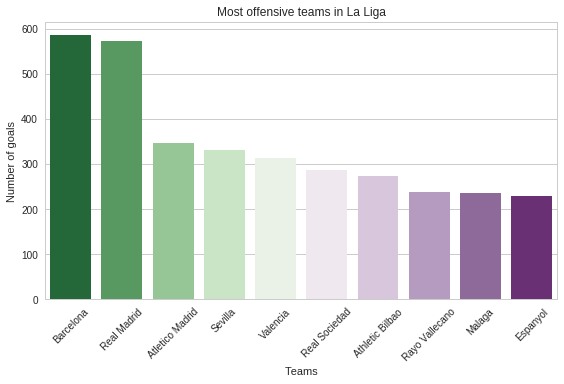

In [175]:
## Grouping attempts by team
grouping_by_offensive = df_events[df_events['league']=='La Liga'][df_events['is_goal']==1].groupby('event_team')

## Sorting the values
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=False)[:10]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## Plotting the teams
plot_barplot(scores, teams, 'Teams', 'Number of goals', 'Most offensive teams in La Liga','PRGn_r')
plt.savefig('offensiveteam.jpg', format='jpg', dpi=1000)

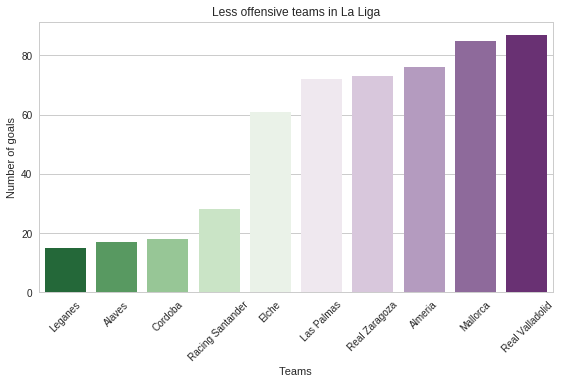

In [178]:
## Grouping attempts by team
grouping_by_offensive = df_events[df_events['league']=='La Liga'][df_events['is_goal']==1].groupby('event_team')

## Sorting the values
grouping_by_offensive = grouping_by_offensive.count().sort_values(by='id_event', ascending=True)[:10]
teams = grouping_by_offensive.index
scores = grouping_by_offensive['id_event']

## Plotting the teams
plot_barplot(scores, teams, 'Teams', 'Number of goals', 'Less offensive teams in La Liga', 'PRGn_r')
plt.savefig('lessoffensiveteam.jpg', format='jpg', dpi=1000)

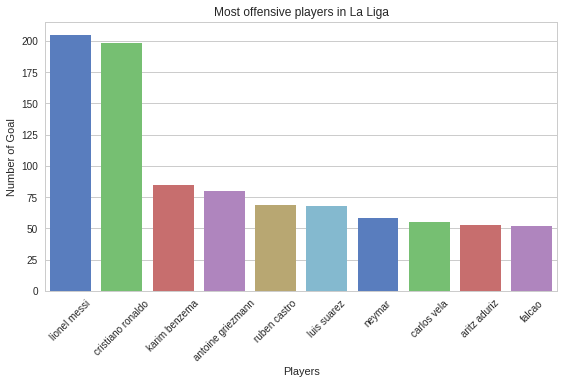

In [181]:
## grouping by player when is goal
grouping_by_offensive_player = df_events[df_events['league']=='La Liga'][df_events['is_goal']==1].groupby('player')

## Couting and sorting the number of goals by player, then pick the top 10
grouping_by_offensive_player = grouping_by_offensive_player.count().sort_values(by='id_event',
                                                                                ascending=False)[:10]
## Extracting player names
players = grouping_by_offensive_player.index
## Extracting values (# of goals)
scores = grouping_by_offensive_player['id_event']

## Plotting the chart
plot_barplot(scores, players, 'Players', 'Number of Goal', 'Most offensive players in La Liga')
plt.savefig('offensiveteamplayer.jpg', format='jpg', dpi=1000)

In [9]:
## Loading events dataset
df_events1 = pd.read_csv("./events.csv")
## Loading ginf dataset, which has some important data to merge with event dataset
df_ginf1 = pd.read_csv("./ginf.csv")
## Selecting only the features I need. `id_odsp` serves as a unique identifier that will be used to 
## union the 2 datasets
## Join the 2 datasets to add 'date', 'league', 'season', and 'country' information to the main dataset
df_events1 = df_events1.merge(df_ginf1, how='left')
df_events1 = df_events1[['id_odsp', 'id_event', 'league', 'season', 'ht', 'at', 'event_team', 'is_goal']]
## Naming the leagues with their popular names, which will make thinks much clear for us
leagues = {'E0': 'Premier League', 'SP1': 'La Liga',
          'I1': 'Serie A', 'F1': 'League One', 'D1': 'Bundesliga'}
## Apply the mapping
df_events1['league'] = df_events1['league'].map(leagues)

# cats = ['id_odsp', 'id_event', 'league', 'season', 'ht', 'at', 'event_team']
# d = dict.fromkeys(cats,'category')
# df_events1 = df_events1.astype(d)

In [3]:
df_events1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941009 entries, 0 to 941008
Data columns (total 8 columns):
id_odsp       941009 non-null object
id_event      941009 non-null object
league        941009 non-null object
season        941009 non-null int64
ht            941009 non-null object
at            941009 non-null object
event_team    941009 non-null object
is_goal       941009 non-null int64
dtypes: int64(2), object(6)
memory usage: 64.6+ MB


In [10]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
Leagues = df_events1['league'].unique()
Seasons = list(df_events1['season'].unique())
print(Leagues)
print(Seasons)

['Bundesliga' 'League One' 'La Liga' 'Serie A' 'Premier League']
[2012, 2013, 2014, 2015, 2016, 2017]


In [5]:
df_events1[df_events1['league']== 'Bundesliga'][df_events1['season'] == 2012]['ht'].unique()

/usr/lib/python3/dist-packages/ipykernel/__main__.py:1: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



array(['Borussia Dortmund', 'FC Augsburg', 'Werder Bremen',
       'Hertha Berlin', 'FC Cologne', 'VfB Stuttgart', 'Hannover 96',
       'Mainz', 'Bayern Munich', 'Schalke 04', 'TSG Hoffenheim',
       'Nurnberg', 'SC Freiburg', 'Hamburg SV',
       'Borussia Monchengladbach', 'VfL Wolfsburg', 'Bayer Leverkusen',
       'Kaiserslautern'], dtype=object)

In [108]:
for league in Leagues[::-1]:
    if league == 'Premier League' :
        print('No details on {}'.format(league))
    else:
        for season in Seasons[::-1]:
            print('****Informations about {}'.format(league) + ' ' +'{} ****'.format(season))
            Stats = []
            Teams = df_events1[df_events1['league']== league][df_events1['season'] == season]['ht'].unique()
            Games = df_events1[df_events1['league']== league][df_events1['season'] == season]['id_odsp'].unique()
            for game in Games:
                Events = df_events1[df_events1['league']== league][df_events1['season'] == season][df_events1['id_odsp']==game]
                ht= Events.iloc[1,4]
                at= Events.iloc[1,5]
                Butat=0
                Butht=0
                for j in range(1,Events.shape[0]):
                    if Events.iloc[j,7] == 1 :
                        if Events.iloc[j,6] == ht:
                            Butat +=1
                        else:
                            Butht +=1
                item = [ht, at, Butht, Butat]
                Stats.append(item)
            Stats = np.array(Stats)
            df_Stats = pd.DataFrame({'Teamht': Stats[:,0], 'Butht':Stats[:,2], 'Teamat': Stats[:,1], 'But at':Stats[:,3] })

            results = []
            for team in Teams:
                data_team = df_Stats.loc[(df_Stats['Teamht'] == team)|(df_Stats['Teamat'] == team)]
                nbrgoals = 0
                for j in range(1, data_team.shape[0]):
                    if data_team.iloc[j,2]== team:
                        nbrgoals += int(data_team.iloc[j,0])
                    else:
                        nbrgoals += int(data_team.iloc[j,1])
                elem = [team, nbrgoals]
                results.append(elem)


            results = np.array(results)
            ids = np.argsort(results[:,1])[::-1]
            results[:,1] = results[:,1][ids]
            results[:,0] = results[:,0][ids]
            
            df_results = pd.DataFrame({'ATeam': results[:,0], 'ButsE': results[:,1]})
            print(df_results)

No details on Premier League
****Informations about Serie A 2017 ****
             ATeam ButsE Butsoo
0         Cagliari    42     43
1          Palermo    40     41
2       US Pescara    39     40
3          Crotone    35     36
4         Sassuolo    32     33
5    Chievo Verona    30     31
6           Torino    28     29
7            Genoa    28     29
8        Sampdoria    27     28
9           Empoli    25     26
10         Bologna    25     26
11         Udinese    24     25
12          Napoli    22     23
13      Fiorentina    21     22
14        AC Milan    21     22
15           Lazio    21     22
16        Atalanta    20     21
17  Internazionale    20     21
18         AS Roma    18     19
19        Juventus    15     16
****Informations about Serie A 2016 ****
             ATeam ButsE Butsoo
0        Frosinone    70     71
1          Palermo    61     62
2    Hellas Verona    59     60
3          Udinese    57     58
4        Sampdoria    54     55
5           Torino    52 

KeyboardInterrupt: 

In [ ]:
Leagues

In [11]:
## grouping by player when is goal
goal = df_events[df_events['is_goal']==1]

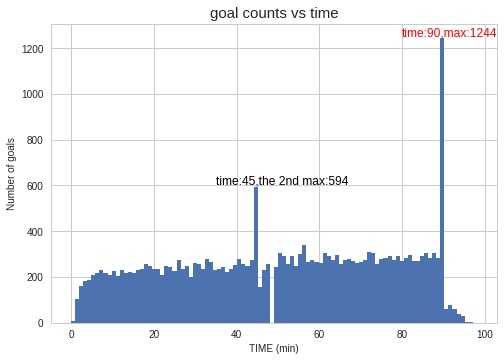

In [205]:
## Plotting the hist
# fig=plt.figure(figsize=(13,10))
plt.hist(goal.time, 100)
plt.xlabel("TIME (min)",fontsize=10)
plt.ylabel("Number of goals",fontsize=10)
plt.title("goal counts vs time",fontsize=15)
x=goal.groupby(by='time')['time'].count().sort_values(ascending=False).index[0]
y=goal.groupby(by='time')['time'].count().sort_values(ascending=False).iloc[0]
x1=goal.groupby(by='time')['time'].count().sort_values(ascending=False).index[1]
y1=goal.groupby(by='time')['time'].count().sort_values(ascending=False).iloc[1]
plt.text(x=x-10,y=y+10,s='time:'+str(x)+',max:'+str(y),fontsize=12,fontdict={'color':'red'})
plt.text(x=x1-10,y=y1+10,s='time:'+str(x1)+',the 2nd max:'+str(y1),fontsize=12,fontdict={'color':'black'})
plt.savefig('goals.jpg', format='jpg', dpi=1000)
plt.show() 

In [134]:
goal = df_events[df_events['event_team']=='Barcelona'][df_events['league']=='La Liga'][df_events['is_goal'] == 1]

In [146]:
# event_types = {1:'Attempt', 2:'Corner', 3:'Foul', 4:'Yellow card', 5:'Second yellow card', 6:'Red card', 7:'Substitution', 8:'Free kick won', 9:'Offside', 10:'Hand ball', 11:'Penalty conceded'}
# event_types2 = {12:'Key Pass', 13:'Failed through ball', 14:'Sending off', 15:'Own goal'}
# sides = {1:'Home', 2:'Away'}
# shot_places = {1:'Bit too high', 2:'Blocked', 3:'Bottom left corner', 4:'Bottom right corner', 5:'Centre of the goal', 6:'High and wide', 7:'Hits the bar', 8:'Misses to the left', 9:'Misses to the right', 10:'Too high', 11:'Top centre of the goal', 12:'Top left corner', 13:'Top right corner'}
shot_outcomes = {1:'On target', 2:'Off target', 3:'Blocked', 4:'Hit the bar'}
# locations = {1:'Attacking half', 2:'Defensive half', 3:'Centre of the box', 4:'Left wing', 5:'Right wing', 6:'Difficult angle and long range', 7:'Difficult angle on the left', 8:'Difficult angle on the right', 9:'Left side of the box', 10:'Left side of the six yard box', 11:'Right side of the box', 12:'Right side of the six yard box', 13:'Very close range', 14:'Penalty spot', 15:'Outside the box', 16:'Long range', 17:'More than 35 yards', 18:'More than 40 yards', 19:'Not recorded'}
# bodyparts = {1:'right foot', 2:'left foot', 3:'head'}
assist_methods = {0:np.nan, 1:'Pass', 2:'Cross', 3:'Headed pass', 4:'Through ball'}
situations = {1:'Open play', 2:'Set piece', 3:'Corner', 4:'Free kick'}
# goal['event_type']=goal.event_type.map(event_types)
# goal['event_type2']=goal.event_type2.map(event_types2)
# goal['side'] = goal['side'].map(sides)
# goal['shot_place'] =goal['shot_place'].map(shot_places)
goal['shot_outcome'] = goal['shot_outcome'].map(shot_outcomes)
# goal['location'] = goal['location'].map(locations)
# goal['bodypart'] = goal['bodypart'].map(bodyparts)
goal['assist_method'] =goal['assist_method'].map(assist_methods)
goal['situation'] = goal['situation'].map(situations)

In [136]:
goal1=goal.copy()
# goal1.loc['bodypart']=goal1['bodypart'].fillna('right foot')
# goal1.time=goal1['time'].fillna(goal1.time.median())

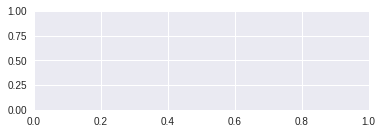

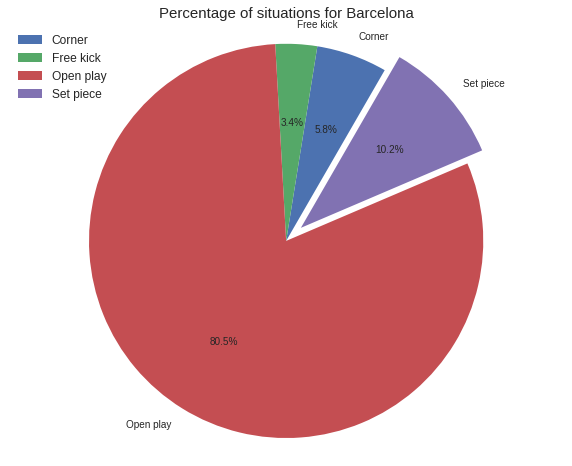

In [137]:
plt.subplot(2,1,1)
plt.figure(figsize=(10,8))
data1=goal1.groupby(by=['situation'])['situation'].count()
colors=["green", "red","yellow", "pink"]
plt.pie(data1,autopct='%1.1f%%',labels=data1.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of situations for Barcelona",fontsize=15)
plt.legend(fontsize=12,loc='best')
# plt.show()

In [116]:
data1

situation
Corner        34
Free kick     20
Open play    472
Set piece     60
Name: situation, dtype: int64

In [138]:
goal = df_events[df_events['event_team']=='Barcelona'][df_events['league']=='La Liga']
goal['shot_outcome'] = goal['shot_outcome'].map(shot_outcomes)
goal1=goal.copy()

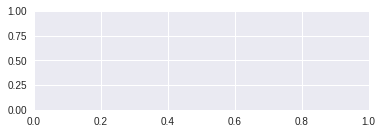

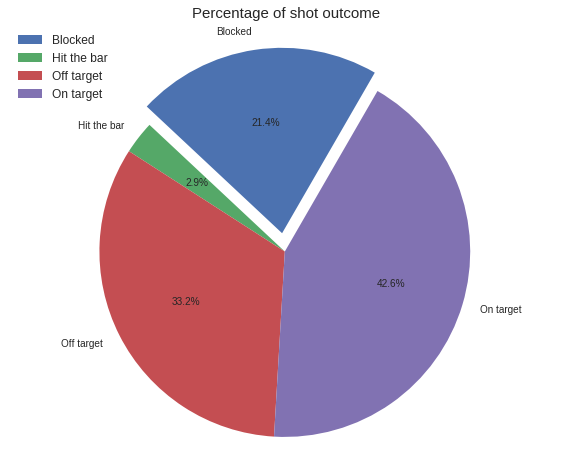

In [139]:
plt.subplot(2,1,2)
plt.figure(figsize=(10,8))
data2=goal1.groupby(by=['shot_outcome'])['shot_outcome'].count()
colors=["green", "red","yellow", "pink"]
plt.pie(data2,autopct='%1.1f%%',labels=data2.index,startangle=60,explode=(0.1,0,0,0))
plt.axis('equal')
plt.title("Percentage of shot outcome",fontsize=15)
plt.legend(fontsize=12,loc='best')
plt.show()

In [141]:
from matplotlib.gridspec import GridSpec

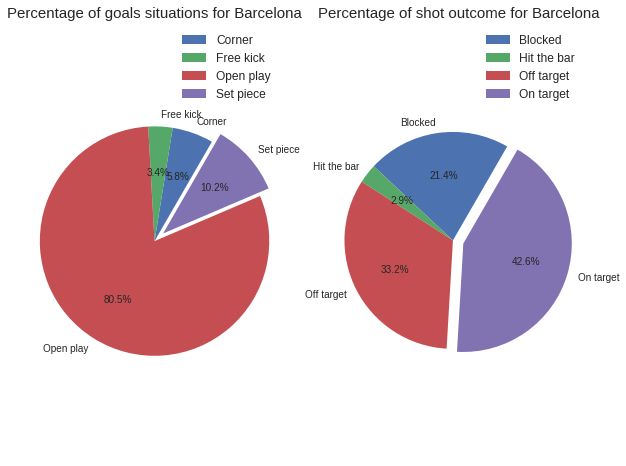

In [160]:
the_grid = GridSpec(1, 2)
goal = df_events[df_events['event_team']=='Barcelona'][df_events['league']=='La Liga'][df_events['is_goal'] == 1]
goal['situation'] = goal['situation'].map(situations)
goal1=goal.copy()
plt.figure(figsize=(10,8))
# plt.subplot(2,1,1)

data1=goal1.groupby(by=['situation'])['situation'].count()
# colors=["green", "red","yellow", "pink"]
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(data1,autopct='%1.1f%%',labels=data1.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of goals situations for Barcelona",fontsize=15)
plt.legend(fontsize=12,loc='best')


goals = df_events[df_events['event_team']=='Barcelona'][df_events['league']=='La Liga']
goals['shot_outcome'] = goals['shot_outcome'].map(shot_outcomes)
goals1=goals.copy()
# plt.subplot(2,1,2)
# plt.figure(figsize=(10,8))
data2=goals1.groupby(by=['shot_outcome'])['shot_outcome'].count()
colors=["green", "red","yellow", "pink"]
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(data2,autopct='%1.1f%%',labels=data2.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of shot outcome for Barcelona",fontsize=15)
plt.legend(fontsize=12,loc='best')
plt.savefig('barca.jpg', format='jpg', dpi=1000)
plt.show()

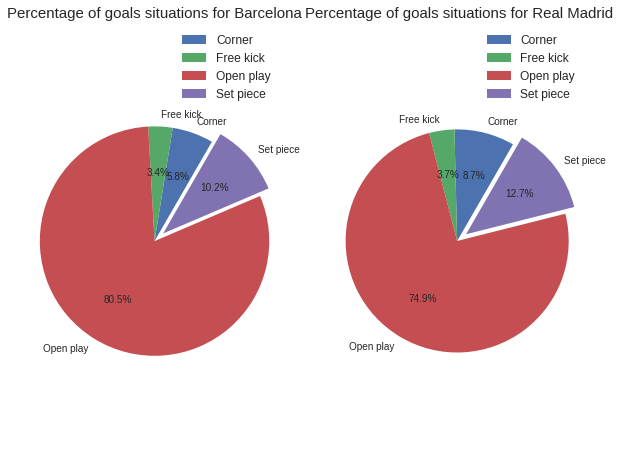

In [161]:
the_grid = GridSpec(1, 2)
goal = df_events[df_events['event_team']=='Barcelona'][df_events['league']=='La Liga'][df_events['is_goal'] == 1]
goal['situation'] = goal['situation'].map(situations)
goal1=goal.copy()
plt.figure(figsize=(10,8))
# plt.subplot(2,1,1)

data1=goal1.groupby(by=['situation'])['situation'].count()
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(data1,autopct='%1.1f%%',labels=data1.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of goals situations for Barcelona",fontsize=15)
plt.legend(fontsize=12,loc='best')


goal = df_events[df_events['event_team']=='Real Madrid'][df_events['league']=='La Liga'][df_events['is_goal'] == 1]
goal['situation'] = goal['situation'].map(situations)
goal1=goal.copy()
# plt.subplot(2,1,2)
# plt.figure(figsize=(10,8))
data1=goal1.groupby(by=['situation'])['situation'].count()
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(data1,autopct='%1.1f%%',labels=data1.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of goals situations for Real Madrid",fontsize=15)
plt.legend(fontsize=12,loc='best')
plt.savefig('barcavsrealmadrid.jpg', format='jpg', dpi=1000)
plt.show()

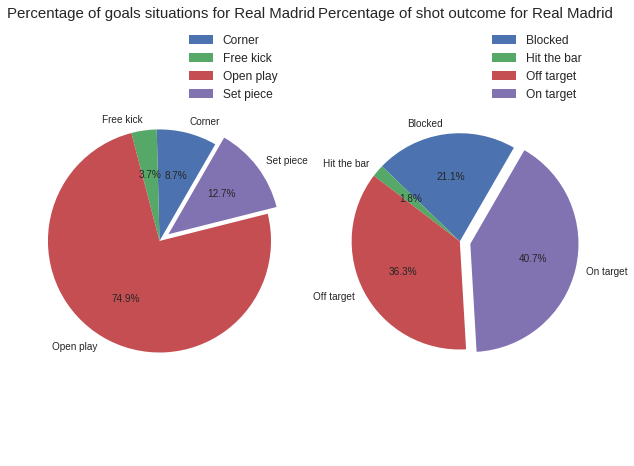

In [162]:
the_grid = GridSpec(1, 2)
goal = df_events[df_events['event_team']=='Real Madrid'][df_events['league']=='La Liga'][df_events['is_goal'] == 1]
goal['situation'] = goal['situation'].map(situations)
goal1=goal.copy()
plt.figure(figsize=(10,8))

data1=goal1.groupby(by=['situation'])['situation'].count()
plt.subplot(the_grid[0, 0], aspect=1)
plt.pie(data1,autopct='%1.1f%%',labels=data1.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of goals situations for Real Madrid",fontsize=15)
plt.legend(fontsize=12,loc='best')


goals = df_events[df_events['event_team']=='Real Madrid'][df_events['league']=='La Liga']
goals['shot_outcome'] = goals['shot_outcome'].map(shot_outcomes)
goals1=goals.copy()
data2=goals1.groupby(by=['shot_outcome'])['shot_outcome'].count()
colors=["green", "red","yellow", "pink"]
plt.subplot(the_grid[0, 1], aspect=1)
plt.pie(data2,autopct='%1.1f%%',labels=data2.index,startangle=60,explode=(0,0,0,0.1))
plt.axis('equal')
plt.title("Percentage of shot outcome for Real Madrid",fontsize=15)
plt.legend(fontsize=12,loc='best')
plt.savefig('realmadrid.jpg', format='jpg', dpi=1000)
plt.show()

In [111]:
data2

shot_outcome
Blocked         685
Hit the bar      92
Off target     1064
On target      1366
Name: shot_outcome, dtype: int64

In [182]:
redCards = df_events[df_events['league']=='La Liga'][df_events['event_type'] == 6]['event_team']

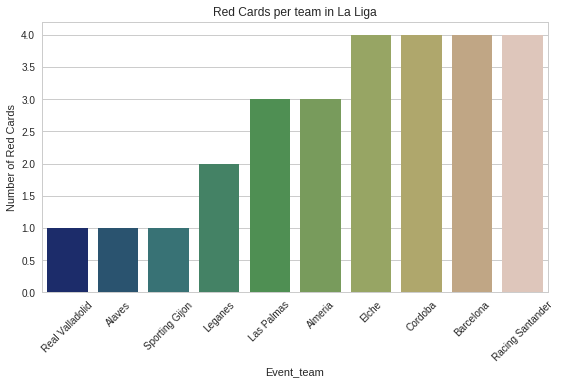

In [197]:
## Count of events occurecies
redCards_series = redCards.value_counts().sort_values(ascending=True)[:10]

## Plotting chart 
plot_barplot(redCards_series, redCards_series.index,
            "Event_team", "Number of Red Cards", "Red Cards per team in La Liga", 'gist_earth')
plt.savefig('redcard.jpg', format='jpg', dpi=1000)

In [185]:
yellowCards = df_events[df_events['league']=='La Liga'][df_events['event_type'] == (4 or 5)]['event_team']

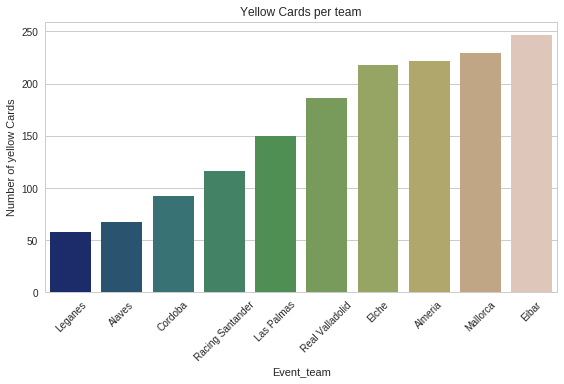

In [196]:
## Count of events occurecies
yellowCards_series = yellowCards.value_counts().sort_values(ascending=True)[:10]

## Plotting chart 
plot_barplot(yellowCards_series, yellowCards_series.index,
            "Event_team", "Number of yellow Cards", "Yellow Cards per team", 'gist_earth')

In [133]:
df_events['event_team'].unique()

array(['Hamburg SV', 'Borussia Dortmund', 'FC Augsburg', 'SC Freiburg',
       'Werder Bremen', 'Kaiserslautern', 'Lorient',
       'Paris Saint-Germain', 'Valenciennes', 'Caen', 'Hertha Berlin',
       'Nurnberg', 'Evian Thonon Gaillard', 'Brest', 'AC Ajaccio',
       'Toulouse', 'Nice', 'Lyon', 'VfL Wolfsburg', 'FC Cologne',
       'AS Nancy Lorraine', 'Lille', 'Montpellier', 'AJ Auxerre',
       'VfB Stuttgart', 'Schalke 04', 'Hannover 96', 'TSG Hoffenheim',
       'Sochaux', 'Marseille', 'Bordeaux', 'St Etienne', 'Stade Rennes',
       'Dijon FCO', 'Mainz', 'Bayer Leverkusen', 'Bayern Munich',
       'Borussia Monchengladbach', 'Sporting Gijon', 'Real Sociedad',
       'Valencia', 'Racing Santander', 'Real Madrid', 'Real Zaragoza',
       'Sevilla', 'Malaga', 'Rayo Vallecano', 'Athletic Bilbao', 'Getafe',
       'Levante', 'Osasuna', 'Atletico Madrid', 'Espanyol', 'Mallorca',
       'Villarreal', 'Barcelona', 'AC Milan', 'Lazio', 'Cesena', 'Napoli',
       'Internazionale', 'Palerm

In [143]:
def Team_strategy(team):  
    goal = df_events[df_events['is_goal']==1][df_events['event_team'] == team]
    plt.hist(goal[goal["situation"]==1]["time"],width=1,bins=100,label="Open play")   
    plt.hist(goal[goal["situation"]==2]["time"],width=1,bins=100,label="Set Piece (excluding direct FreeKick)") 
    plt.hist(goal[goal["situation"]==3]["time"],width=1,bins=100,label="Corners") 
    plt.hist(goal[goal["situation"]==4]["time"],width=1,bins=100,label="Direct Free Kick") 
    plt.xlabel("Minutes")
    plt.ylabel("Number of goals")
    plt.legend()
    plt.title("Number of goals (by situations) against Time during match for {}".format(team),fontname="Times New Roman Bold",fontsize=14,fontweight="bold")
    plt.tight_layout()

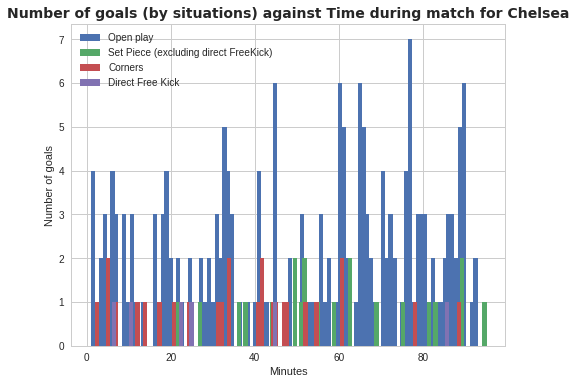

In [146]:
# plt.subplot(4,1,1)
team = 'Chelsea'
Team_strategy(team)

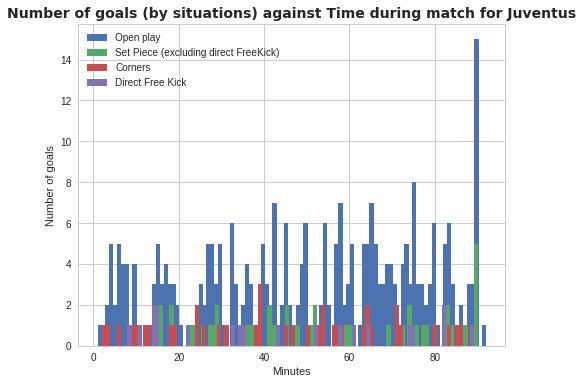

In [147]:
# plt.subplot(4,1,2)
team = 'Juventus'
Team_strategy(team)

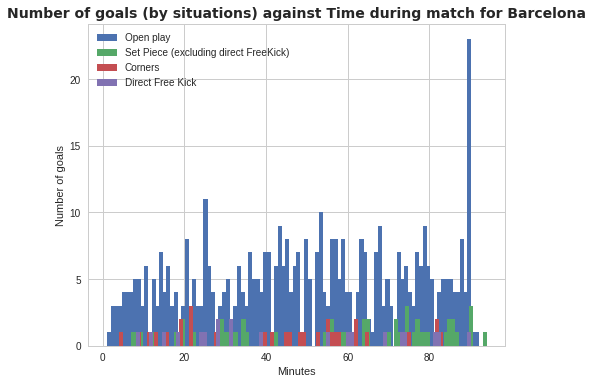

In [148]:
# plt.subplot(4,1,3)
team = 'Barcelona'
Team_strategy(team)

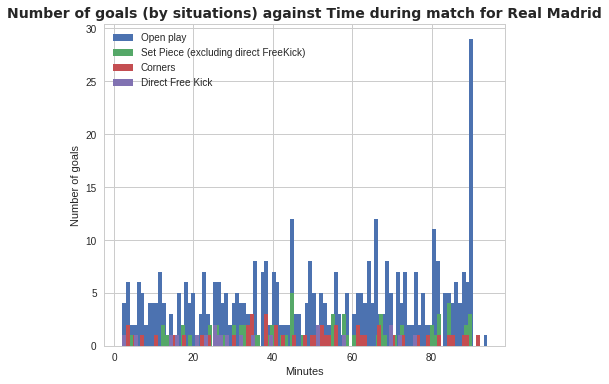

In [149]:
# plt.subplot(4,1,4)
team = 'Real Madrid'
Team_strategy(team)

In [72]:
# Penalties
penalties=df_events[df_events["location"]==14]

In [80]:
# Check the shot place
for i in range(14):
    if sum(penalties["shot_place"]==i)==0:
        print(i)

0
2


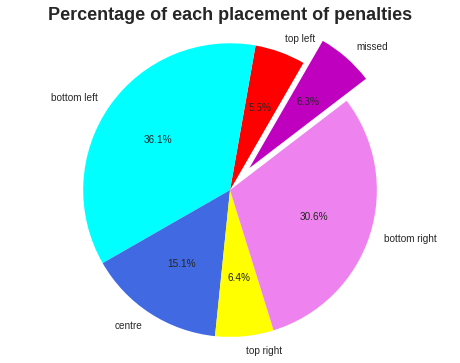

In [83]:
top_left=sum(penalties["shot_place"]==12)
bot_left=sum(penalties["shot_place"]==3)
top_right=sum(penalties["shot_place"]==13)
bot_right=sum(penalties["shot_place"]==4)
centre=sum(penalties["shot_place"]==5)+sum(penalties["shot_place"]==11)
missed=sum(penalties["shot_place"]==1)+sum(penalties["shot_place"]==6)+sum(penalties["shot_place"]==7)+sum(penalties["shot_place"]==8)+sum(penalties["shot_place"]==9)+sum(penalties["shot_place"]==10)

labels_pen=["top left","bottom left","centre","top right","bottom right","missed"]
num_pen=[top_left,bot_left,centre,top_right,bot_right,missed]
colors_pen=["red", "aqua","royalblue","yellow","violet","m"]
plt.pie(num_pen,labels=labels_pen,colors=colors_pen,autopct='%1.1f%%',startangle=60,explode=(0,0,0,0,0,0.2))
plt.axis('equal')
plt.title("Percentage of each placement of penalties",fontsize=18,fontweight="bold")
fig=plt.gcf()  
fig.set_size_inches(8,6)
plt.show()

,left foot,right foot
Scored,454,1535


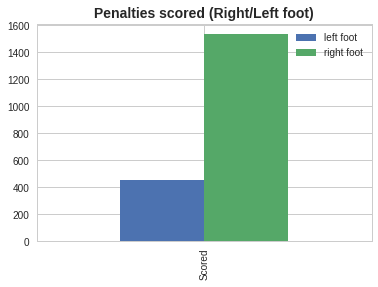

In [94]:
# success rate of penalties
scored_pen=penalties[penalties["is_goal"]==1]
pen_rightfoot=scored_pen[scored_pen["bodypart"]==1].shape[0]
pen_leftfoot=scored_pen[scored_pen["bodypart"]==2].shape[0]

penalty_combi=pd.DataFrame({"right foot":pen_rightfoot,"left foot":pen_leftfoot},index=["Scored"])
penalty_combi.plot(kind="bar")
plt.title("Penalties scored (Right/Left foot)",fontsize=14,fontweight="bold")
penalty_combi

In [37]:
def pen_stats(player):
    player_pen=penalties[penalties["player"]==player]
    right_attempt=player_pen[player_pen["bodypart"]==1]
    right_attempt_scored=right_attempt[right_attempt["is_goal"]==1].shape[0]
    right_attempt_missed=right_attempt[right_attempt["is_goal"]==0].shape[0]
    left_attempt=player_pen[player_pen["bodypart"]==2]
    left_attempt_scored=left_attempt[left_attempt["is_goal"]==1].shape[0]
    left_attempt_missed=left_attempt[left_attempt["is_goal"]==0].shape[0]
    scored=pd.DataFrame({"right foot":right_attempt_scored,"left foot":left_attempt_scored},index=["Scored"])
    missed=pd.DataFrame({"right foot":right_attempt_missed,"left foot":left_attempt_missed},index=["Missed"])
    combi=scored.append(missed)
    return combi

In [130]:
pen_stats("james rodriguez")

,left foot,right foot
Scored,2,0
Missed,0,0


In [131]:
pen_stats("lionel messi")

,left foot,right foot
Scored,30,0
Missed,7,0


In [132]:
pen_stats("cristiano ronaldo")

,left foot,right foot
Scored,0,43
Missed,0,8


In [50]:
pen_stats('mohamed sallah')

,left foot,right foot
Scored,0,0
Missed,0,0


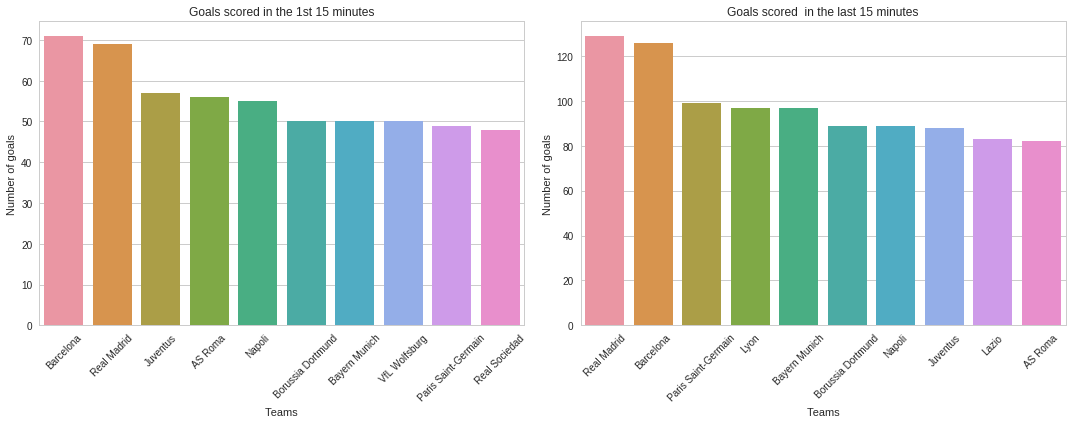

In [168]:
## Filtering out events with time <= 15'
first_15 = df_events[df_events['time'] <= 15]
## Filtering out events with time between 75' and 90'
last_15 = df_events[(df_events['time'] >= 75) & (df_events['time'] <= 90)]

## Grouping by teams for the first 15'
top_10_scorer_first_15 = first_15[first_15['is_goal'] == 1].groupby('event_team').count().sort_values(by='id_event', ascending=False)

## Extracting teams from dataframe
teams = top_10_scorer_first_15.index[:10]
## Extracting number of goals 
scores = top_10_scorer_first_15['id_event'][:10]

## Plotting results
sns.set_style("whitegrid")
fig, axs = plt.subplots(ncols=2, figsize=(15, 6))
ax = sns.barplot(x = [j for j in range(0, len(scores))], y=scores.values, ax=axs[0])
ax.set_xticks([j for j in range(0, len(scores))])
ax.set_xticklabels(teams, rotation=45)
ax.set(xlabel = 'Teams', ylabel = 'Number of goals', title = 'Goals scored in the 1st 15 minutes');

## Grouping by last 15' scorers
top_10_scorer_last_15 = last_15[last_15['is_goal'] == 1].groupby('event_team').count().sort_values(by='id_event', ascending=False)[:10]

## Extracting the names of the teams
teams_last_15 = top_10_scorer_last_15.index[:10]
## Extracting the number of goals
scores_last_15 = top_10_scorer_last_15['id_event'][:10]

## Plottin the results
ax = sns.barplot(x = [j for j in range(0, len(scores_last_15))], y=scores_last_15.values, ax=axs[1])
ax.set_xticks([j for j in range(0, len(scores_last_15))])
ax.set_xticklabels(teams_last_15, rotation=45)
ax.set(xlabel = 'Teams', ylabel = 'Number of goals', title = 'Goals scored  in the last 15 minutes');
plt.savefig('Lastminutewinners.jpg', format='jpg', dpi=1000)
fig.tight_layout()

In [141]:
# penalties["player"].unique()

In [142]:
def pen_full_stats(player):
    player_pen=penalties[penalties["player"]==player]
    scored_pen=player_pen[player_pen["is_goal"]==1]
    missed_pen=player_pen[player_pen["is_goal"]==0]
    
    top_left_rightfoot=scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==1].shape[0]
    top_left_leftfoot=scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==2].shape[0]
    bot_left_rightfoot=scored_pen[scored_pen["shot_place"]==3][scored_pen["bodypart"]==1].shape[0]
    bot_left_leftfoot=scored_pen[scored_pen["shot_place"]==3][scored_pen["bodypart"]==2].shape[0]
    top_right_rightfoot=scored_pen[scored_pen["shot_place"]==13][scored_pen["bodypart"]==1].shape[0]
    top_right_leftfoot=scored_pen[scored_pen["shot_place"]==13][scored_pen["bodypart"]==2].shape[0]
    bot_right_rightfoot=scored_pen[scored_pen["shot_place"]==4][scored_pen["bodypart"]==1].shape[0]
    bot_right_leftfoot=scored_pen[scored_pen["shot_place"]==4][scored_pen["bodypart"]==2].shape[0]
    centre_rightfoot=scored_pen[scored_pen["shot_place"]==5][scored_pen["bodypart"]==1].shape[0]+scored_pen[scored_pen["shot_place"]==11][scored_pen["bodypart"]==1].shape[0]
    centre_leftfoot=scored_pen[scored_pen["shot_place"]==5][scored_pen["bodypart"]==2].shape[0]+scored_pen[scored_pen["shot_place"]==11][scored_pen["bodypart"]==2].shape[0]
    scored_without_recorded_loc_rightfoot=scored_pen[scored_pen["shot_place"].isnull()][scored_pen["bodypart"]==1].shape[0]
    scored_without_recorded_loc_leftfoot=scored_pen[scored_pen["shot_place"].isnull()][scored_pen["bodypart"]==2].shape[0]
    missed_rightfoot=missed_pen[missed_pen["bodypart"]==1].shape[0]
    missed_leftfoot=missed_pen[missed_pen["bodypart"]==2].shape[0]
    
    right_foot=pd.DataFrame({"Top Left Corner":top_left_rightfoot,"Bottom Left Corner":bot_left_rightfoot,"Top Right Corner":top_right_rightfoot,"Bottom Right Corner":bot_right_rightfoot,"Centre":centre_rightfoot,"Unrecorded placement":scored_without_recorded_loc_rightfoot,"Missed":missed_rightfoot},index=["Right Foot attempt"])
    left_foot=pd.DataFrame({"Top Left Corner":top_left_leftfoot,"Bottom Left Corner":bot_left_leftfoot,"Top Right Corner":top_right_leftfoot,"Bottom Right Corner":bot_right_leftfoot,"Centre":centre_leftfoot,"Unrecorded placement":scored_without_recorded_loc_leftfoot,"Missed":missed_leftfoot},index=["Left Foot attempt"])
    
    fullstats=right_foot.append(left_foot)
    fullstats=fullstats[["Top Right Corner","Bottom Right Corner","Top Left Corner","Bottom Left Corner","Centre","Unrecorded placement","Missed"]]
    return fullstats


In [161]:
import warnings
warnings.filterwarnings('ignore')

In [162]:
pen_full_stats("lionel messi")

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,0,0,0,0,0,0,0
Left Foot attempt,7,8,3,6,5,1,7


In [163]:
pen_full_stats("cristiano ronaldo")

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,3,14,2,19,3,2,8
Left Foot attempt,0,0,0,0,0,0,0


In [58]:
def stats(player):
    player_pen=df_events[df_events["player"]==player]
    right_attempt=player_pen[player_pen["bodypart"]==1]
    right_attempt_scored=right_attempt[right_attempt["is_goal"]==1].shape[0]
    right_attempt_missed=right_attempt[right_attempt["is_goal"]==0].shape[0]
    left_attempt=player_pen[player_pen["bodypart"]==2]
    left_attempt_scored=left_attempt[left_attempt["is_goal"]==1].shape[0]
    left_attempt_missed=left_attempt[left_attempt["is_goal"]==0].shape[0]
    head_attempt=player_pen[player_pen["bodypart"]==3]
    head_attempt_scored=head_attempt[head_attempt["is_goal"]==1].shape[0]
    head_attempt_missed=head_attempt[head_attempt["is_goal"]==0].shape[0]
    scored=pd.DataFrame({"right foot":right_attempt_scored,"left foot":left_attempt_scored, "head": head_attempt_scored},index=["Scored"])
    missed=pd.DataFrame({"right foot":right_attempt_missed,"left foot":left_attempt_missed, "head": head_attempt_missed},index=["Missed"])
    combi=scored.append(missed)
    return combi

In [59]:
stats('lionel messi')

,head,left foot,right foot
Scored,8,167,30
Missed,45,585,79


In [60]:
stats("cristiano ronaldo")

,head,left foot,right foot
Scored,36,32,130
Missed,123,205,664


In [61]:
def full_stats(player):
    player_pen=df_events[df_events["player"]==player]
    scored_pen=player_pen[player_pen["is_goal"]==1]
    missed_pen=player_pen[player_pen["is_goal"]==0]
    
    top_left_rightfoot=scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==1].shape[0]
    top_left_leftfoot=scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==2].shape[0]
    top_left_head = scored_pen[scored_pen["shot_place"]==12][scored_pen["bodypart"]==3].shape[0]
    
    bot_left_rightfoot=scored_pen[scored_pen["shot_place"]==3][scored_pen["bodypart"]==1].shape[0]
    bot_left_leftfoot=scored_pen[scored_pen["shot_place"]==3][scored_pen["bodypart"]==2].shape[0]
    bot_left_head = scored_pen[scored_pen["shot_place"]==3][scored_pen["bodypart"]==3].shape[0]   
    
    top_right_rightfoot=scored_pen[scored_pen["shot_place"]==13][scored_pen["bodypart"]==1].shape[0]
    top_right_leftfoot=scored_pen[scored_pen["shot_place"]==13][scored_pen["bodypart"]==2].shape[0]
    top_right_head = scored_pen[scored_pen["shot_place"]==13][scored_pen["bodypart"]==3].shape[0]
    
    bot_right_rightfoot=scored_pen[scored_pen["shot_place"]==4][scored_pen["bodypart"]==1].shape[0]
    bot_right_leftfoot=scored_pen[scored_pen["shot_place"]==4][scored_pen["bodypart"]==2].shape[0]
    bot_right_head = scored_pen[scored_pen["shot_place"]==4][scored_pen["bodypart"]==3].shape[0]
    
    centre_rightfoot=scored_pen[scored_pen["shot_place"]==5][scored_pen["bodypart"]==1].shape[0]+scored_pen[scored_pen["shot_place"]==11][scored_pen["bodypart"]==1].shape[0]
    centre_leftfoot=scored_pen[scored_pen["shot_place"]==5][scored_pen["bodypart"]==2].shape[0]+scored_pen[scored_pen["shot_place"]==11][scored_pen["bodypart"]==2].shape[0]
    centre_head = scored_pen[scored_pen["shot_place"]==5][scored_pen["bodypart"]==3].shape[0]
    
    scored_without_recorded_loc_rightfoot=scored_pen[scored_pen["shot_place"].isnull()][scored_pen["bodypart"]==1].shape[0]
    scored_without_recorded_loc_leftfoot=scored_pen[scored_pen["shot_place"].isnull()][scored_pen["bodypart"]==2].shape[0]
    scored_without_recorded_loc_head=scored_pen[scored_pen["shot_place"].isnull()][scored_pen["bodypart"]==3].shape[0]

    missed_rightfoot=missed_pen[missed_pen["bodypart"]==1].shape[0]
    missed_leftfoot=missed_pen[missed_pen["bodypart"]==2].shape[0]
    missed_head=missed_pen[missed_pen["bodypart"]==3].shape[0]
    
    right_foot=pd.DataFrame({"Top Left Corner":top_left_rightfoot,"Bottom Left Corner":bot_left_rightfoot,"Top Right Corner":top_right_rightfoot,"Bottom Right Corner":bot_right_rightfoot,"Centre":centre_rightfoot,"Unrecorded placement":scored_without_recorded_loc_rightfoot,"Missed":missed_rightfoot},index=["Right Foot attempt"])
    left_foot=pd.DataFrame({"Top Left Corner":top_left_leftfoot,"Bottom Left Corner":bot_left_leftfoot,"Top Right Corner":top_right_leftfoot,"Bottom Right Corner":bot_right_leftfoot,"Centre":centre_leftfoot,"Unrecorded placement":scored_without_recorded_loc_leftfoot,"Missed":missed_leftfoot},index=["Left Foot attempt"])
    head=pd.DataFrame({"Top Left Corner":top_left_head,"Bottom Left Corner":bot_left_head,"Top Right Corner":top_right_head,"Bottom Right Corner":bot_right_head,"Centre":centre_head,"Unrecorded placement":scored_without_recorded_loc_head,"Missed":missed_head},index=["Head attempt"])

    
    fullstats=right_foot.append(left_foot.append(head))
    fullstats=fullstats[["Top Right Corner","Bottom Right Corner","Top Left Corner","Bottom Left Corner","Centre","Unrecorded placement","Missed"]]
    return fullstats


In [62]:
full_stats('lionel messi')

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,2,11,1,12,4,0,79
Left Foot attempt,22,43,13,52,32,5,585
Head attempt,1,1,0,6,0,0,45


In [165]:
full_stats("cristiano ronaldo")

,Top Right Corner,Bottom Right Corner,Top Left Corner,Bottom Left Corner,Centre,Unrecorded placement,Missed
Right Foot attempt,13,34,8,48,19,8,664
Left Foot attempt,0,9,1,9,11,2,205
Head attempt,1,8,7,11,8,1,123


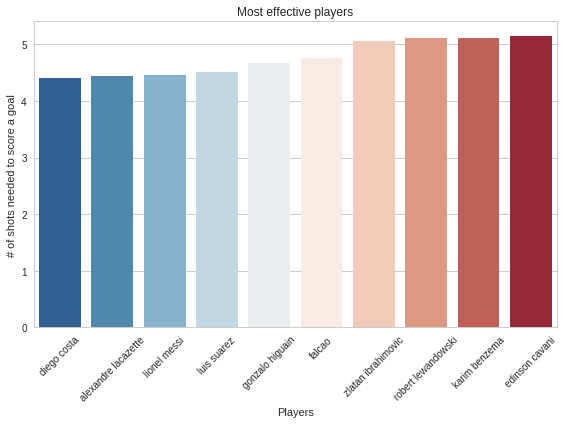

In [168]:
# Most effective player
    ## Grouping by player when attempt == 1
grouped_by_player = df_events[df_events['event_type'] == 1].groupby('player').count()

## Grouping by player when is goal and attempt == 1
grouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('player').count()

## Grouping by player when is not goal and attempt == 1
grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('player').count()

## Setting a threshold to filter out players with a small number of attempts, which can lead to a lack 
## of consistency in the final result
threshold = grouped_by_player['id_event'].std()

grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('player').count()
## filtering players that have at least more than average number of chances to skip noise
## For example, a player that has 2 attempts and 1 goal has a very high effectiveness, even though,
## this particular player has not created many chances for his team
grouped_by_player_is_goal_filtered = grouped_by_player_goals[grouped_by_player_goals['id_event'] > threshold]
grouped_by_players_not_goal_filtered = grouped_by_player_not_goals[grouped_by_player_not_goals['id_event'] > threshold]

## Total number of attemtps
total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

## Dividing the total of attempts by the attemtps which ended up in goals
result = total/grouped_by_player_is_goal_filtered['id_event']

## Dropping NaN values
result.dropna(inplace=True)

## Sorting results
sorted_results = result.sort_values(ascending=True)

## Extracting players names
players = sorted_results[:10].index
## Extracting value of effectiveness
effectiveness = sorted_results[:10]

## Plotting results
plot_barplot(effectiveness, players, 'Players', 
            '# of shots needed to score a goal',
            'Most effective players',
            'RdBu_r', 8, 6)

In [150]:
# # Most effective player
#     ## Grouping by player when attempt == 1
# grouped_by_player = df_events[df_events['event_type'] == 1].groupby('event_team').count()

# ## Grouping by player when is goal and attempt == 1
# grouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
#                              (df_events['is_goal'] == 1)].groupby('event_team').count()

# ## Grouping by player when is not goal and attempt == 1
# grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
#                              (df_events['is_goal'] == 0)].groupby('event_team').count()

# ## Setting a threshold to filter out players with a small number of attempts, which can lead to a lack 
# ## of consistency in the final result
# threshold = grouped_by_player['id_event'].std()

# grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('event_team').count()
# ## filtering players that have at least more than average number of chances to skip noise
# ## For example, a player that has 2 attempts and 1 goal has a very high effectiveness, even though,
# ## this particular player has not created many chances for his team
# grouped_by_player_is_goal_filtered = grouped_by_player_goals[grouped_by_player_goals['id_event'] > threshold]
# grouped_by_players_not_goal_filtered = grouped_by_player_not_goals[grouped_by_player_not_goals['id_event'] > threshold]

# ## Total number of attemtps
# total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

# ## Dividing the total of attempts by the attemtps which ended up in goals
# result = total/grouped_by_player_is_goal_filtered['id_event']

# ## Dropping NaN values
# result.dropna(inplace=True)

# ## Sorting results
# sorted_results = result.sort_values(ascending=True)

# ## Extracting players names
# players = sorted_results[:10].index
# ## Extracting value of effectiveness
# effectiveness = sorted_results[:10]

# ## Plotting results
# plot_barplot(effectiveness, players, 'Players', 
#             '# of shots needed to score a goal',
#             'Most effective players')

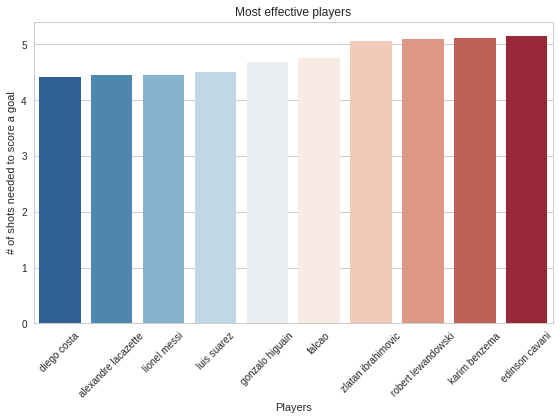

In [246]:
grouped_by_player = df_events[df_events['event_type'] == 1].groupby('player').count()
rouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('player').count()
grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('player').count()
threshold = grouped_by_player['is_goal'].std()
grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('player').count()
grouped_by_player_is_goal_filtered = grouped_by_player_is_goal[grouped_by_player_is_goal['is_goal'] >= threshold ]
grouped_by_players_not_goal_filtered = grouped_by_player_not_goals[grouped_by_player_not_goals['is_goal'] >= threshold ]

## Total number of attemtps
total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

## Dividing the total of attempts by the attemtps which ended up in goals
result = total/grouped_by_player_is_goal_filtered['id_event']

## Dropping NaN values
result.dropna(inplace=True)

## Sorting results
sorted_results = result.sort_values(ascending=True)

## Extracting players names
players = sorted_results[:10].index
## Extracting value of effectiveness
effectiveness = sorted_results[:10]

## Plotting results
plot_barplot(effectiveness, players, 'Players', 
            '# of shots needed to score a goal',
            'Most effective players',
            'RdBu_r', 8, 6)

In [231]:
threshold

73.90118408026117

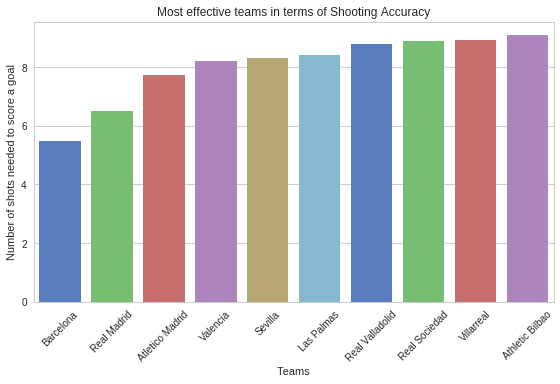

In [179]:
grouped_by_player = df_events[df_events['league'] == 'La Liga'][df_events['event_type'] == 1].groupby('event_team').count()
rouped_by_player_goals = df_events[df_events['league'] == 'La Liga'][(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('event_team').count()
grouped_by_player_not_goals = df_events[df_events['league'] == 'La Liga'][(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('event_team').count()
threshold = grouped_by_player['is_goal'].std()
grouped_by_player_is_goal = df_events[df_events['league'] == 'La Liga'][df_events['is_goal'] == 1].groupby('event_team').count()
grouped_by_player_is_goal_filtered = grouped_by_player_is_goal
grouped_by_players_not_goal_filtered = grouped_by_player_not_goals

## Total number of attemtps
total = grouped_by_players_not_goal_filtered['id_event'] + grouped_by_player_is_goal_filtered['id_event']

## Dividing the total of attempts by the attemtps which ended up in goals
result = total/grouped_by_player_is_goal_filtered['id_event']

## Dropping NaN values
result.dropna(inplace=True)

## Sorting results
sorted_results = result.sort_values(ascending=True)

## Extracting players names
players = sorted_results[:10].index
## Extracting value of effectiveness
effectiveness = sorted_results[:10]

## Plotting results
plot_barplot(effectiveness, players, 'Teams', 
            'Number of shots needed to score a goal',
            'Most effective teams in terms of Shooting Accuracy')

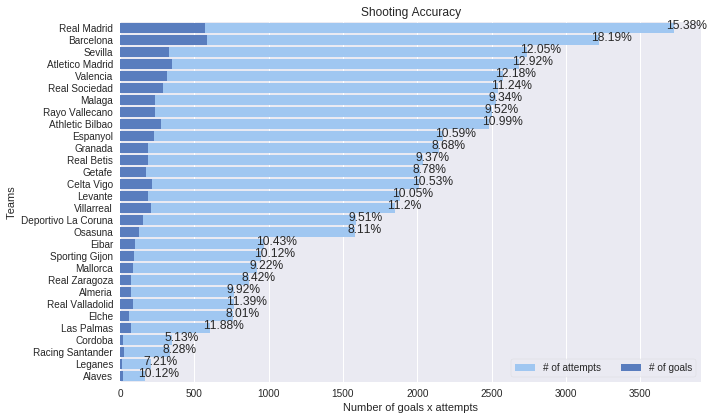

In [189]:
## Creating a dataframe with total of attempts and total goals
result_df = pd.DataFrame({'total': total.dropna(), 'is_goal': grouped_by_player_is_goal_filtered['id_event']})
## Sorting values by total
result_df.sort_values('total', ascending=False, inplace=True)

## Setting style to dark
sns.set(style="darkgrid")

## Creating figure
f, ax = plt.subplots(figsize=(10, 6))

## Plotting chart
sns.set_color_codes("pastel")
sns.barplot(x="total",
            y=result_df.index,
            data=result_df,
            label="# of attempts", color="b")

sns.set_color_codes("muted")
sns.barplot(x='is_goal',
            y=result_df.index, 
            data=result_df,
            label="# of goals", color="b")

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="Teams",
       xlabel="Number of goals x attempts", title='Shooting Accuracy')

each = result_df['is_goal'].values
the_total = result_df['total'].values
x_position = 50

for i in range(len(ax.patches[:30])):
    ax.text(ax.patches[i].get_width() - x_position, ax.patches[i].get_y() +.50, 
            str(round((each[i]/the_total[i])*100, 2))+'%')
    
sns.despine(left=True, bottom=True)
f.tight_layout()
plt.savefig('ShootingAccuracy.jpg', format='jpg', dpi=1000)

In [219]:
grouped_by_player_is_goal_filtered['id_event']

player
alexandre lacazette          88
alexis sanchez               80
antoine griezmann            80
antonio di natale            76
cristiano ronaldo           198
diego costa                  93
edinson cavani              121
falcao                       80
gonzalo higuain             118
karim benzema                85
lionel messi                205
luis suarez                  96
pierreemerick aubameyang    100
robert lewandowski          124
sergio aguero                75
zlatan ibrahimovic          153
Name: id_event, dtype: int64

In [206]:
players = sorted_results[:10].index
players

Index(['Barcelona', 'Paris Saint-Germain', 'Real Madrid', 'Bayern Munich',
       'AS Monaco', 'Borussia Dortmund', 'Atletico Madrid', 'Manchester City',
       'Lyon', 'Borussia Monchengladbach'],
      dtype='object', name='event_team')

In [201]:
threshold

73.90118408026117

In [202]:
grouped_by_player_is_goal_filtered

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,opponent,player,...,is_goal,location,bodypart,assist_method,situation,fast_break,date,league,season,country
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,114,114,114,114,114,114,80,114,114,114,...,114,114,114,114,114,114,114,114,114,114
AC Milan,329,329,329,329,329,329,212,329,329,329,...,329,329,329,329,329,329,329,329,329,329
AS Monaco,233,233,233,233,233,233,154,233,233,233,...,233,233,233,233,233,233,233,233,233,233
AS Nancy Lorraine,88,88,88,88,88,88,64,88,88,88,...,88,88,88,88,88,88,88,88,88,88
AS Roma,373,373,373,373,373,373,262,373,373,373,...,373,373,373,373,373,373,373,373,373,373
Almeria,76,76,76,76,76,76,47,76,76,76,...,76,76,76,76,76,76,76,76,76,76
Arsenal,241,241,241,241,241,241,184,241,241,241,...,241,241,241,241,241,241,241,241,241,241
Aston Villa,88,88,88,88,88,88,67,88,88,88,...,88,88,88,88,88,88,88,88,88,88
Atalanta,230,230,230,230,230,230,153,230,230,230,...,230,230,230,230,230,230,230,230,230,230


In [191]:
grouped_by_player = df_events[df_events['event_type'] == 1].groupby('event_team').count()
rouped_by_player_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 1)].groupby('event_team').count()
grouped_by_player_not_goals = df_events[(df_events['event_type'] == 1) &
                             (df_events['is_goal'] == 0)].groupby('event_team').count()
threshold = grouped_by_player['id_event'].std()
grouped_by_player_is_goal = df_events[df_events['is_goal'] == 1].groupby('event_team').count()
grouped_by_player_is_goal_filtered = grouped_by_player_goals[grouped_by_player_goals['id_event'] > threshold]


In [192]:
threshold

895.9490994372054

In [188]:
grouped_by_player_is_goal

,id_odsp,id_event,sort_order,time,text,event_type,event_type2,side,opponent,player,...,is_goal,location,bodypart,assist_method,situation,fast_break,date,league,season,country
event_team,,,,,,,,,,,,,,,,,,,,,
AC Ajaccio,114,114,114,114,114,114,80,114,114,114,...,114,114,114,114,114,114,114,114,114,114
AC Milan,329,329,329,329,329,329,212,329,329,329,...,329,329,329,329,329,329,329,329,329,329
AJ Auxerre,46,46,46,46,46,46,29,46,46,46,...,46,46,46,46,46,46,46,46,46,46
AS Monaco,233,233,233,233,233,233,154,233,233,233,...,233,233,233,233,233,233,233,233,233,233
AS Nancy Lorraine,88,88,88,88,88,88,64,88,88,88,...,88,88,88,88,88,88,88,88,88,88
AS Roma,373,373,373,373,373,373,262,373,373,373,...,373,373,373,373,373,373,373,373,373,373
Alaves,17,17,17,17,17,17,11,17,17,17,...,17,17,17,17,17,17,17,17,17,17
Almeria,76,76,76,76,76,76,47,76,76,76,...,76,76,76,76,76,76,76,76,76,76
Angers,55,55,55,55,55,55,36,55,55,55,...,55,55,55,55,55,55,55,55,55,55
